In [170]:
# téléchargement

from pymatgen.symmetry import analyzer as az
from pymatgen.ext.matproj import MPRester
import numpy as np

cle_materiau = "mp-20072"
cle_utilisateur = "om6hvHlirPcyuxXF"

with MPRester(cle_utilisateur) as m:
    structure = m.get_structure_by_material_id(cle_materiau)

In [171]:
# petite fonction utilitaire avec exemple

def give_coord(A):
    """
    détermine les nouvelles coordonnées d'un point (x,y,z)
    en fonction de la matrice de rotation A:
    
    A_ij appartient a {1,0,-1}
    
                    1 0 0
    résultat si A = 0 1 0  : ['x','y','z']
                    0 0 1
    """
    x = ['x','y','z']
    y = ['']*3
    index = [0,1,2] 
    for i in index:
        for j in index:
            if A[i][j] == 1:
                if y[j] == '':
                    y[j] = x[i]
                else :
                    y[j] += '+'+x[i]
                
            if A[i][j] == -1:
                y[j] += '-'+ x[i]
    return y

A = np.zeros((3,3))
A[0][1] = -1
A[1][0] = -1
A[2][2] = 1
print(A,end='\n\n')
print(give_coord(A))

[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]

['-y', '-x', 'z']


In [190]:
an = az.SpacegroupAnalyzer(structure)
structure = an.get_conventional_standard_structure()
an = az.SpacegroupAnalyzer(structure)


# on récupère les informations de site sur 3 atomes différents
all_sites = structure.sites
sites = [all_sites[1], all_sites[3], all_sites[7]]

for site in sites:
    print('position de l\'atome "'+str(site.specie)+'" : '+str(np.around(site.frac_coords,4)))
    

# on prend 3 opérations de symétries différentes de l'identité et qui ne sont pas l'opposé d'une opération déjà utilisée
all_symetries = an.get_symmetry_operations()
symetries = [all_symetries[7], all_symetries[12], all_symetries[25]]


# on fait un bel affichage
i = 0
for s in symetries :
    i+=1 
    rot_matrix = s.rotation_matrix
    tr_vector = s.translation_vector
    
    print('\n\nsymétrie '+str(i)+':')
    print('matrice de rotation :')
    print(np.around(rot_matrix),end='\n\n')
    print(give_coord(rot_matrix))
    print('\nvecteur de translation : '+str(np.around(tr_vector,2))+'\n')
    
    for site in sites :
        new_coord = np.dot(site.frac_coords, rot_matrix)+tr_vector
        print('nouvelle position pour l\'atome "'+str(site.specie)+'" : '+str(np.around(new_coord,4)))

position de l'atome "La" : [1.  1.  0.5]
position de l'atome "Cu" : [0. 0. 0.]
position de l'atome "O" : [0.     0.     0.1067]


symétrie 1:
matrice de rotation :
[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]

['-y', '-x', 'z']

vecteur de translation : [0. 0. 0.]

nouvelle position pour l'atome "La" : [-1.  -1.   0.5]
nouvelle position pour l'atome "Cu" : [0. 0. 0.]
nouvelle position pour l'atome "O" : [0.     0.     0.1067]


symétrie 2:
matrice de rotation :
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

['x', 'y', 'z']

vecteur de translation : [0.67 0.33 0.33]

nouvelle position pour l'atome "La" : [1.6667 1.3333 0.8333]
nouvelle position pour l'atome "Cu" : [0.6667 0.3333 0.3333]
nouvelle position pour l'atome "O" : [0.6667 0.3333 0.44  ]


symétrie 3:
matrice de rotation :
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]

['-x', '-y', '-z']

vecteur de translation : [0.33 0.67 0.67]

nouvelle position pour l'atome "La" : [-0.6667 -0.3333  0.1667]
nouvelle position pour l'atome "Cu" : [0.33

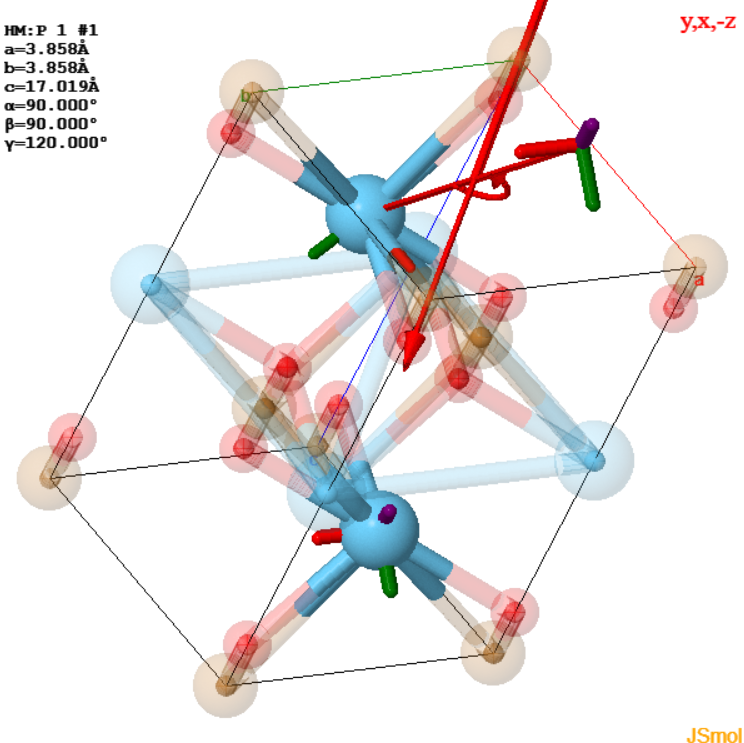

In [173]:
"""
    maintenant occupons nous de montrer l'effet de ces symétries :
    dans la suite il y a une image par symétrie pour chaque atome,
    (il faut noter que les atomes pris en compte ne sont pas les mêmes que ceux utilisés dans le code,
    ils n'ont pas les mêmes coordonnées).
        la symétrie 1 du code correspond à la symétrie '7'  dans jsmol (y     , x     , -z    )
        la symétrie 2 du code correspond à la symétrie '13' dans jsmol (x-1/3 , y+1/3 , z+1/3 )
        la symétrie 3 du code correspond à la symétrie '26' dans jsmol (-x+1/3, -y-1/3, -z-1/3)

    ces images ont été prises en chargeant le fichier 'LaCuO2_mp-20072_symmetrized.cif' dans jsmol
    En effet, les autres fichiers donnaient des résultats bizarres.
    
    Alors que les calculs précédents on été faits avec la 'conventional_standard_structure'.
    C'est une combinaison qui me semble bizarre mais c'est la seule qui m'a permit d'avoir des 
    résultats.
    
    En effet, la structure symmetrized est ici la seule sur laquelle les opérations dans jsmol 
    fonctionnent correctement, et la 'conventional_standard_structure' contient des opérations 
    similaires à celles que montre jsmol lorsqu'on y charge la symmetrized structure.
    
    Dans la suite, l'affichage se fait comme suit :
        La : symétrie 1
        La : symétrie 2
        La : symétrie 3
        Cu : symétrie 1
        ...
"""

from IPython.display import Image
Image(filename='la7.PNG')

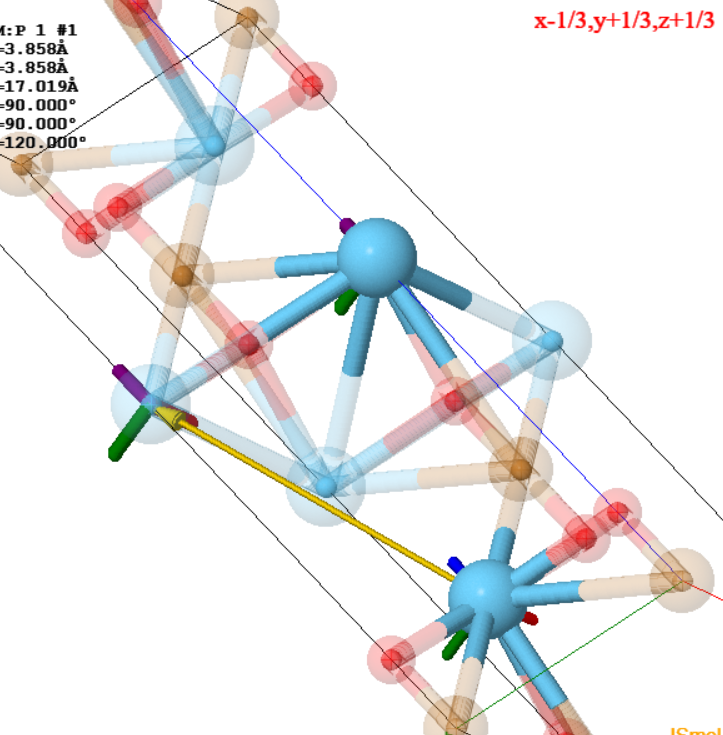

In [174]:
Image(filename='la13.PNG')

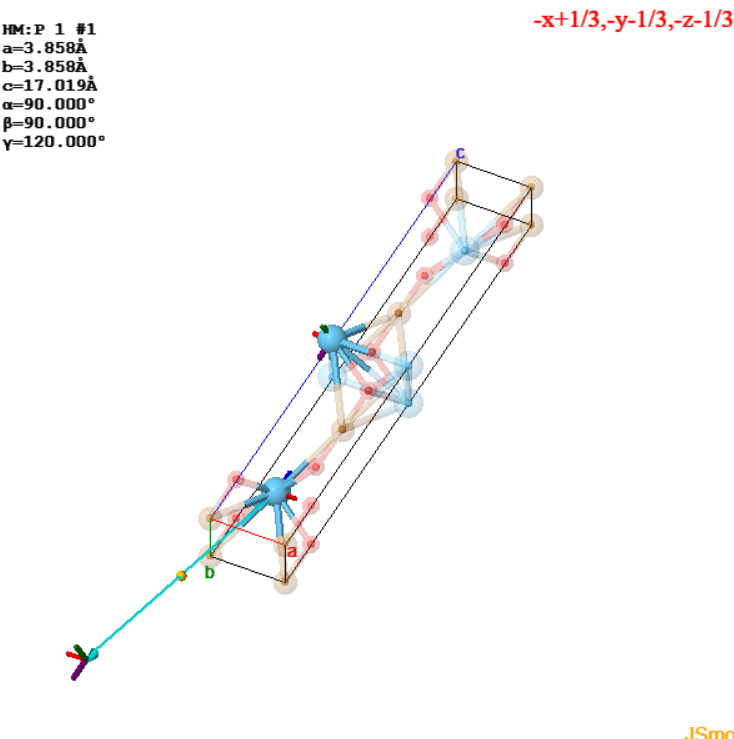

In [175]:
Image(filename='la26.PNG')

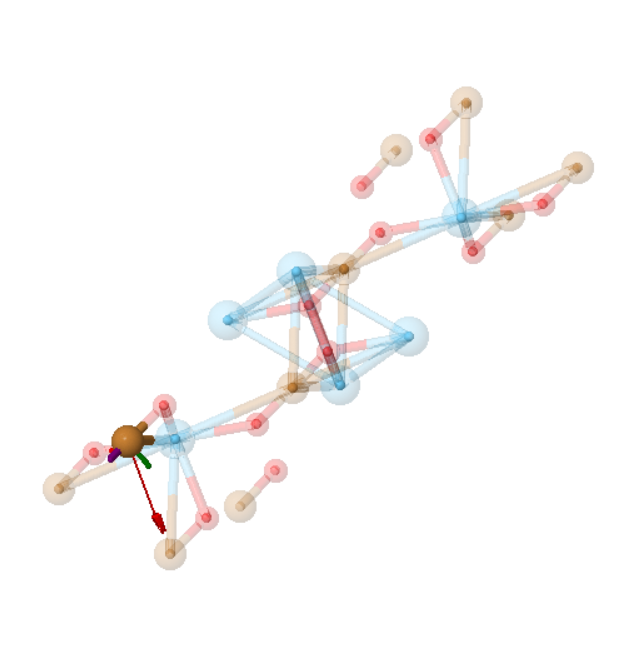

In [176]:
Image(filename='Cu7.PNG')

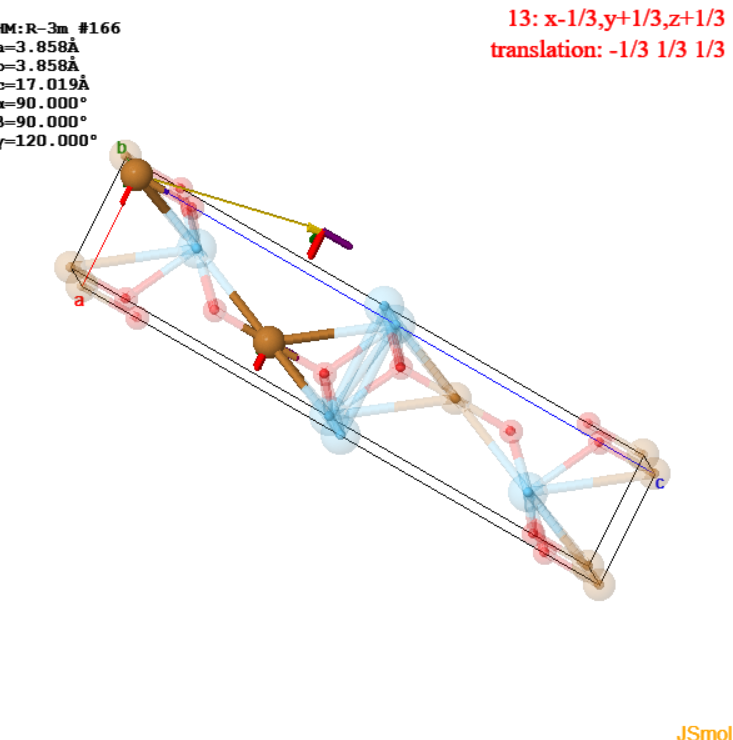

In [177]:
Image(filename='Cu13.PNG')

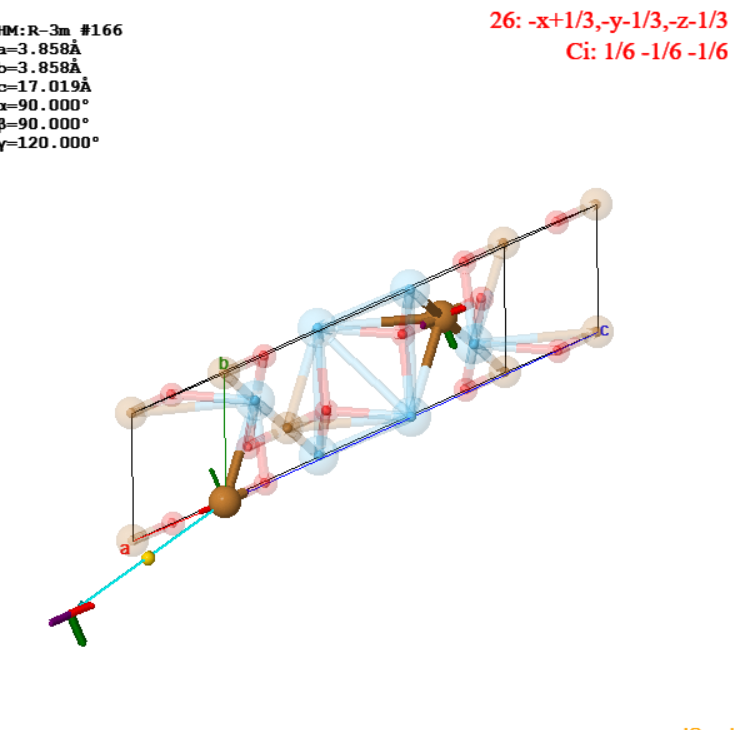

In [178]:
Image(filename='Cu26.PNG')

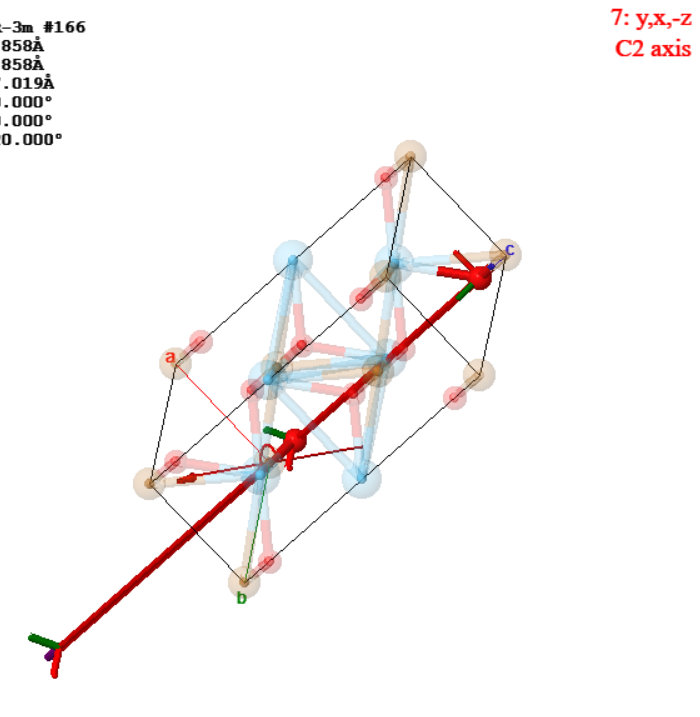

In [179]:
Image(filename='O27.PNG')

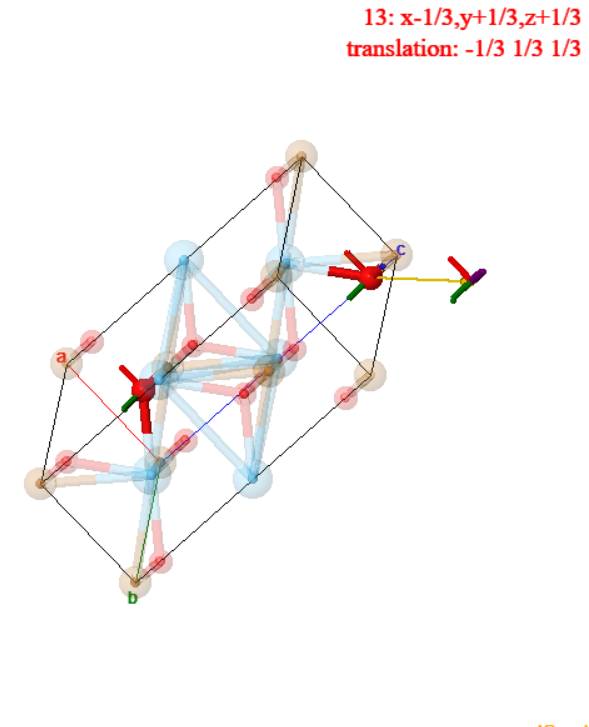

In [180]:
Image(filename='O213.PNG')

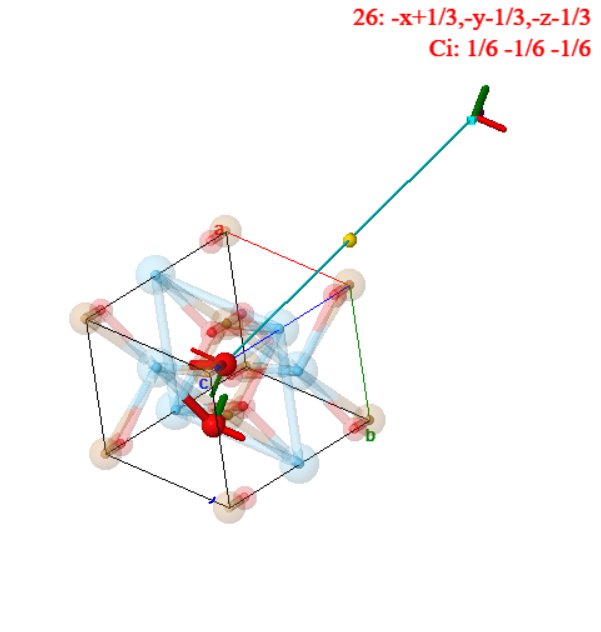

In [181]:
Image(filename='O226.PNG')